# Coursework1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs. 

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook and you can ignore the **tests** folder

#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the ```/content/``` directory (this is the default working directory - you can also change directories with ```%cd```)



### Setup
You will need to install pytorch and other libraries by running the following cell:

In [13]:
# !pip install -q otter-grader pandoc torch torchvision sklearn seaborn
import sys
!pip install otter-grader
!pip install matplotlib
!pip install numpy

     |████████████████████████████████| 165 kB 9.6 MB/s 
     |████████████████████████████████| 90 kB 11.3 MB/s 
     |████████████████████████████████| 77 kB 7.7 MB/s 
     |████████████████████████████████| 10.9 MB 78.6 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=92fca7bc9b77e562808fe5fe41b86ced72809e1e3e1c8d969f1257f6c99fc7d7
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [14]:
# Uploading test files on google colab

!git clone https://github.com/lavinama/tests.git
!ls


Cloning into 'tests'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
 NaturalImageNetTest		        ResNet2_2.pt
'NaturalImageNetTest.zip?download=1'    sample_data
 NaturalImageNetTrain		        tests
'NaturalImageNetTrain.zip?download=1'


In [15]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic pytorch operations to define the 2D convolution, 2D max pooling, linear layer as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not what to see any _for loops_!

**Your Task**
- implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

### Convolutional Layer

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        self.w = torch.randn([out_channels, in_channels, kernel_size, kernel_size])
        # Bias should have shape [out_channels]
        self.b = torch.randn([out_channels])
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #
        ...
        #
        H = x.size()[2]
        W = x.size()[3]
        # print("x: ", x.size())
        out_unfold = F.unfold(input=x, kernel_size=(self.kernel_size, self.kernel_size), padding=self.padding,
                              stride=self.stride)
        # print("out_unfold: ", out_unfold.size())
        out_unfold_t = out_unfold.transpose(1, 2)
        # print("out_unfold_t: ", out_unfold_t.size())
        # print("weight: ", self.w.size())
        w_flatten = self.w.view(self.w.size(0), -1)
        # print("w_flatten:", w_flatten.size())
        w_flatten_t = w_flatten.t()
        # print("w_flatten_t:", w_flatten_t.size())
        result = out_unfold_t.matmul(w_flatten_t) + self.b
        # print("result:", result.size())
        result_t = result.transpose(1, 2)
        # print("result_t:", result_t.size())

        H_dash = int((H + 2*self.padding -(self.kernel_size - 1) - 1)/self.stride + 1)
        # print("H_dash", H_dash)
        W_dash = int((W + 2*self.padding -(self.kernel_size - 1) - 1)/self.stride + 1)
        # print("W_dash", W_dash)


        out = F.fold(input=result_t, output_size=(H_dash, W_dash), kernel_size=(1, 1))
        # print("answer:", answer.size())
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out
# F = out_channels
# C = in_channels
# conv = Conv2d(in_channels=3, out_channels=1, kernel_size=3)
# N=64, in_channels=3, H=3, W=3
# x = torch.randn(64, 3, 3, 3)
# conv.forward(x)

In [21]:
in_channels = 3
out_channels = 1
x = torch.randn(1, 3, 12, 12)
kernel_size = 2
padding = 0
stride = 1

conv = Conv2d(in_channels, out_channels, kernel_size, stride, padding)
correct_conv = nn.Conv2d(in_channels, out_channels, kernel_size)
w = nn.parameter.Parameter(conv.w)
b = nn.parameter.Parameter(conv.b)
correct_conv.weight = w
correct_conv.bias = b
correct_out = correct_conv(x)
out = conv.forward(x)
diff = torch.max(torch.abs(out - correct_out))
print(diff)

tensor(7.1526e-07, grad_fn=<MaxBackward1>)


In [22]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!

### MaxPool

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if type(kernel_size) is int:
            self.kernel_size = (kernel_size, kernel_size)
        else:
            self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        H = x.size()[2]
        W = x.size()[3]

        out_unfold = F.unfold(input=x, kernel_size=self.kernel_size, stride=self.kernel_size)
        out_unfold_reshape = out_unfold.reshape(out_unfold.size()[0], in_channels, self.kernel_size[0]*self.kernel_size[1], -1)
        
        max_values = torch.max(input=out_unfold_reshape, dim=2)[0]
        
        H_dash = int((H -(self.kernel_size[0] - 1) - 1)/self.kernel_size[0] + 1)
        W_dash = int((W -(self.kernel_size[1] - 1) - 1)/self.kernel_size[1] + 1)
        
        out = F.fold(input=max_values, output_size=(H_dash, W_dash), kernel_size=(1, 1))

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [24]:
in_channels = 3
out_channels = 1
x = torch.randn(1, 3, 12, 12)
kernel_size = 2
padding = 0
stride = 1

maxpool = MaxPool2d(kernel_size=2)
out = maxpool.forward(x)
correct_maxpool = nn.MaxPool2d(kernel_size, dilation=1, return_indices=False, ceil_mode=False)
correct_out = correct_maxpool(x)
diff = torch.max(torch.abs(out - correct_out))
print(diff)

tensor(0.)


In [25]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!

### Linear Layer

In [26]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.randn([in_channels, out_channels])
        self.b = torch.randn([out_channels])
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # x: (N, *, H)
        # out: (N, *, H')
        # H: in_channels = 3
        # H': out_channels = 1
        # w: (H, H')
        # b: H'
        # x = torch.randn(1, 4, 12, 12, 3)
        # print("input: ", x.size())

        # print("weight: ", self.w.size())

        out = x.matmul(self.w) + self.b
        # print("result:", result.size())
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [27]:
in_channels = 3
out_channels = 1
x = torch.randn(1, 4, 12, 12, 3)

linear = Linear(in_channels, out_channels)
correct_linear = nn.Linear(in_channels, out_channels, bias=True)
correct_linear.weight = nn.parameter.Parameter(linear.w.T)
correct_linear.bias = nn.parameter.Parameter(linear.b)
correct_out = correct_linear(x)
out = linear.forward(x)
diff = torch.max(torch.abs(out - correct_out))
print(diff)

tensor(0., grad_fn=<MaxBackward1>)


In [28]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!

### Batch Norm

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        self.gamma = torch.ones(num_features)
        self.beta = torch.zeros(num_features)
        self.running_mean = torch.zeros(num_features)
        self.running_variance = torch.ones(num_features)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        """
        Initialise the running mean and variance here or in init
        """

        self.gamma = self.gamma[None, :, None, None]
        self.beta = self.beta[None, :, None, None]

        if self.training:
            # Batch mean and batch variance used to calculate x' for training

            mean_values_per_batch = torch.mean(input=x, dim=[0, 2, 3], keepdim=True)
            biased_var_values_per_batch = torch.var(input=x, dim=[0, 2, 3], keepdim=True, unbiased=False)
            unbiased_var_values_per_batch = torch.var(input=x, dim=[0, 2, 3], keepdim=True, unbiased=True)

            # update running_mean and running_variance
            self.running_mean = (1-self.momentum)*self.running_mean + self.momentum*mean_values_per_batch
            self.running_variance = (1-self.momentum)*self.running_variance + self.momentum*unbiased_var_values_per_batch
            x_dash = torch.div(x - mean_values_per_batch, torch.sqrt(biased_var_values_per_batch + self.eps))

        else:
            # Running mean  and running variance used to calculate x´ for testing
            x_dash = torch.div(x - self.running_mean[None, :, None, None], torch.sqrt(self.running_variance[None, :, None, None] + self.eps))

        x = x_dash * self.gamma + self.beta
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x

In [30]:
correct_batch = torch.nn.BatchNorm2d(2)
x = torch.rand((3,2,7,6))
correct_out = correct_batch(x.clone())
batch = BatchNorm2d(2)
my_out = batch.forward(x.clone())
(correct_out - my_out).abs().max()

tensor(1.1921e-07, grad_fn=<MaxBackward1>)

In [31]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

###**Downloading NaturalImageNet**

In [1]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else:
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2022-02-07 09:12:08--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTest 100%[===================>] 132.09M  19.0MB/s    in 12s     

2022-02-07 09:12:21 (11.4 MB/s) - ‘NaturalImageNetTest.zip?download=1’ saved [138507970/138507970]

--2022-02-07 09:12:21--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1’

NaturalImageNetTrai 100%[===================>]   1.29G  6.61MB/s    in 1m 59

In [2]:
ON_COLAB = True
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

### Data Augmentation

In [3]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

# ColorJitter: Randomly change the brightness, contrast, saturation and hue of an image.
# RandomApply: Apply randomly a list of transformations with a given probability.
# GaussianBlur: Blurs image with randomly chosen Gaussian blur.
# RandomPerspective: Performs a random perspective transformation of the given image with a given probability.
# RandomAdjustSharpness: Adjust the sharpness of the image randomly with a given probability.
# AutoAugment: automatically augments data based on a the ImageNet data-augmentation policy.

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform_train = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            # transforms.AutoAugment(),
            # transforms.FiveCrop(256),
            # transforms.ColorJitter(),
            transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter(),]), p=0.1),
            transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
            # transforms.RandomPerspective(p=0.05),
            transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.05),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
transform_test = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'
import sys
# print("train_path", sys.path)
train_dataset = datasets.ImageFolder(train_path, transform=transform_train)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])

print(len(train_set), len(val_set), len(test_dataset))

# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 128

"""
Smaller bs the mean and variance are more biased
Correct the batch_size 
"""


# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

17986 1998 2000


###**Visualising some example images** 

In [4]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

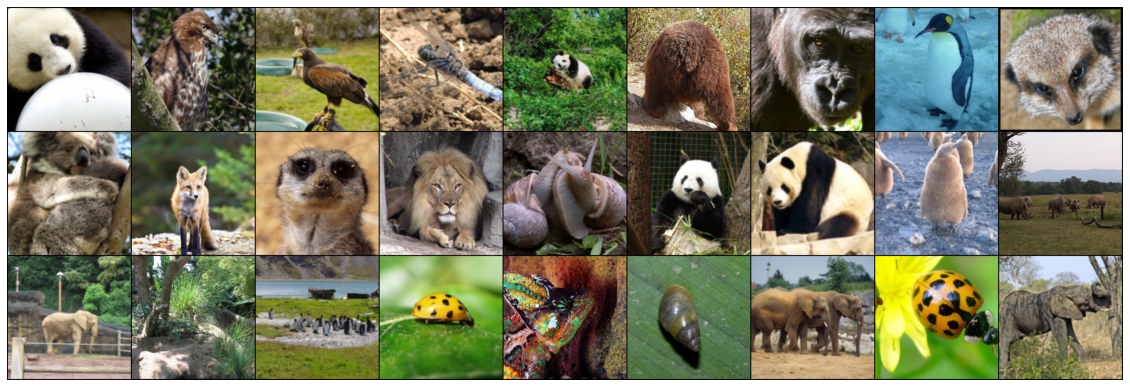

In [5]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

In [6]:
!pwd

/content


### Functions

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  #Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [8]:
print(torch.cuda.is_available())

True


In [9]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
print(device)
    
print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            loss = F.cross_entropy(scores, y)
            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()
            loss.backward()
            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        # check_accuracy(loader_train, model)
        check_accuracy(loader_val, model)
                

cuda:0


### Model given:

ResNet
Total number of parameters is: 11204164
Epoch: 0, Iteration 0, loss = 4.1204
Epoch: 0, Iteration 10, loss = 2.8508
Epoch: 0, Iteration 20, loss = 2.8138
Epoch: 0, Iteration 30, loss = 2.5647
Epoch: 0, Iteration 40, loss = 2.6314
Epoch: 0, Iteration 50, loss = 2.4323
Epoch: 0, Iteration 60, loss = 2.5962
Epoch: 0, Iteration 70, loss = 2.6897
Epoch: 0, Iteration 80, loss = 2.5999
Epoch: 0, Iteration 90, loss = 2.4429
Epoch: 0, Iteration 100, loss = 2.3193
Epoch: 0, Iteration 110, loss = 2.2352
Epoch: 0, Iteration 120, loss = 2.3738
Epoch: 0, Iteration 130, loss = 2.3438
Epoch: 0, Iteration 140, loss = 2.1196
Got 589 / 1998 correct of val set (29.48)
Epoch: 1, Iteration 0, loss = 2.1312
Epoch: 1, Iteration 10, loss = 2.2739
Epoch: 1, Iteration 20, loss = 2.1425
Epoch: 1, Iteration 30, loss = 1.9941
Epoch: 1, Iteration 40, loss = 2.2574
Epoch: 1, Iteration 50, loss = 2.1901
Epoch: 1, Iteration 60, loss = 2.1944
Epoch: 1, Iteration 70, loss = 2.1430
Epoch: 1, Iteration 80, loss = 1.9

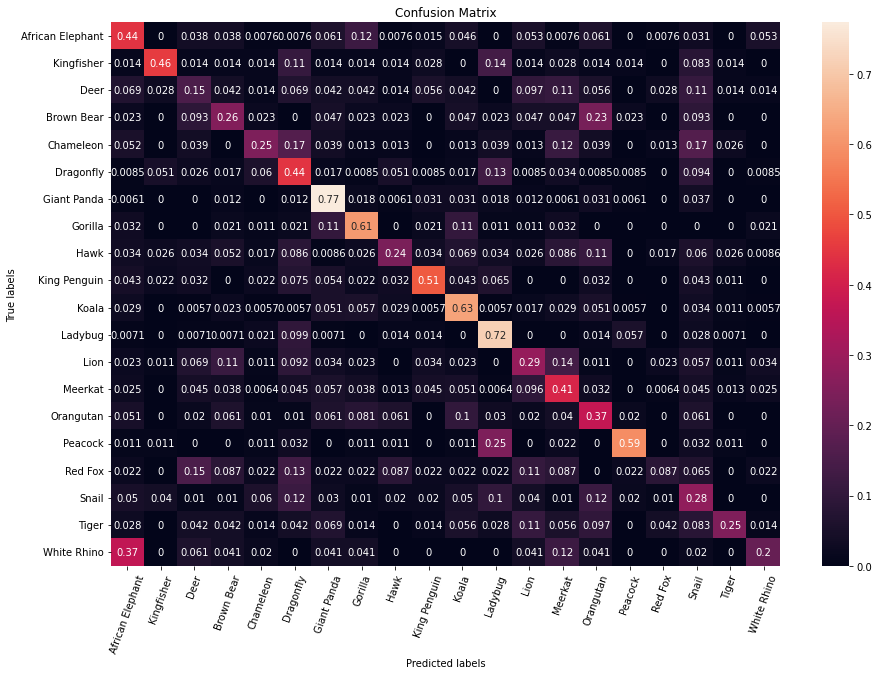

Predicted label ['Dragonfly' 'Snail' 'Snail' 'Orangutan' 'Meerkat' 'Snail' 'Dragonfly'
 'Snail' 'Hawk']
True label ['Kingfisher' 'Ladybug' 'Peacock' 'Snail' 'Deer' 'Lion' 'Meerkat'
 'Dragonfly' 'Dragonfly']
Corresponding images are shown below


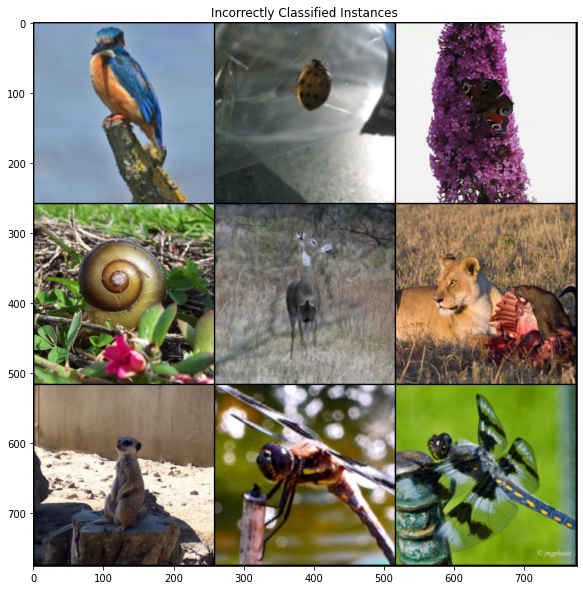

In [19]:
# define resnet building blocks
class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel))
        self.shortcut = nn.Sequential() 
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# define resnet
class ResNet(nn.Module):
    def __init__(self, ResidualBlock, num_classes = 20):
        super(ResNet, self).__init__()
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(16), 
                                  nn.ReLU())
        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer5 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
    
    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

# define and train the network
model = MyResNet()
print("ResNet")
optimizer = optim.Adamax(model.parameters(), lr=0.0001, weight_decay=1e-7) 

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, epochs = 10)

# report test set accuracy
check_accuracy(loader_val, model, analysis=True)
"""
Accuracy of this model:
Got 716 / 1998 correct of val set (35.84)
Got 716 / 1998 correct of val set (35.84)
"""

# save the model
torch.save(model.state_dict(), 'ResNet.pt')

### Our Model:

ResNet2
Total number of parameters is: 11190996
Epoch: 0, Iteration 0, loss = 3.2417
Epoch: 0, Iteration 10, loss = 2.7323
Epoch: 0, Iteration 20, loss = 2.4592
Epoch: 0, Iteration 30, loss = 2.3636
Epoch: 0, Iteration 40, loss = 2.1610
Epoch: 0, Iteration 50, loss = 1.9130
Epoch: 0, Iteration 60, loss = 1.7284
Epoch: 0, Iteration 70, loss = 1.9990
Epoch: 0, Iteration 80, loss = 1.9763
Epoch: 0, Iteration 90, loss = 1.8778
Epoch: 0, Iteration 100, loss = 1.7996
Epoch: 0, Iteration 110, loss = 1.6667
Epoch: 0, Iteration 120, loss = 1.7038
Epoch: 0, Iteration 130, loss = 1.8067
Epoch: 0, Iteration 140, loss = 1.8228
Got 946 / 1998 correct of val set (47.35)
Epoch: 1, Iteration 0, loss = 1.7251
Epoch: 1, Iteration 10, loss = 1.6493
Epoch: 1, Iteration 20, loss = 1.6773
Epoch: 1, Iteration 30, loss = 1.5899
Epoch: 1, Iteration 40, loss = 1.6389
Epoch: 1, Iteration 50, loss = 1.5099
Epoch: 1, Iteration 60, loss = 1.5639
Epoch: 1, Iteration 70, loss = 1.2524
Epoch: 1, Iteration 80, loss = 1.

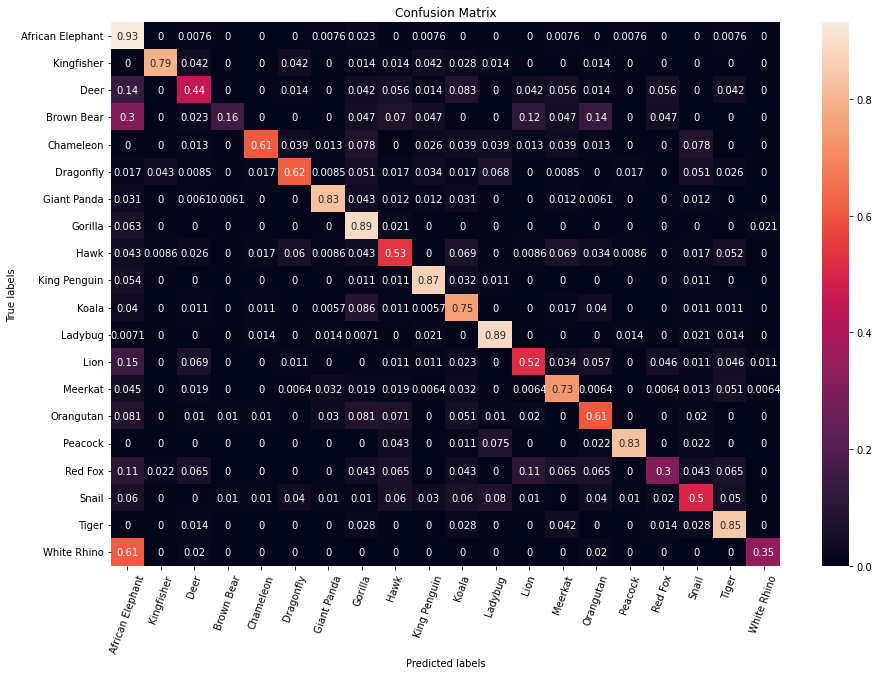

Predicted label ['Giant Panda' 'Orangutan' 'Snail' 'African Elephant' 'Koala'
 'King Penguin' 'Tiger' 'African Elephant' 'Chameleon']
True label ['Dragonfly' 'Hawk' 'Tiger' 'Dragonfly' 'Giant Panda' 'Lion' 'Meerkat'
 'Brown Bear' 'Koala']
Corresponding images are shown below


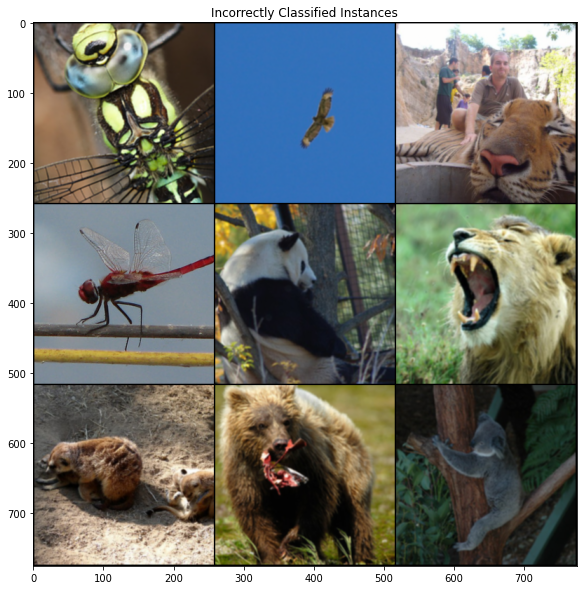

In [10]:
# define resnet building blocks
class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel))
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel)) 
    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# define resnet
class ResNet2(nn.Module):
    def __init__(self, ResidualBlock, num_classes = 20):
        super(ResNet2, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, self.inchannel, kernel_size = 7, stride = 2,
                                            padding = 3, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.avgpool = nn.AvgPool2d(4)
        self.fc = nn.Linear(512, num_classes)
    
    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# please do not change the name of this class
def MyResNet():
    return ResNet2(ResidualBlock)

# define and train the network
print("ResNet2")
model = MyResNet()
optimizer = optim.Adamax(model.parameters(), lr=0.001, weight_decay=1e-5) 

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, epochs = 10)

# report test set accuracy
check_accuracy(loader_val, model, analysis=True)
"""
Accuracy for this model (until 128):
Got 1003 / 1998 correct of val set (50.20)
Got 1003 / 1998 correct of val set (50.20)

Accuracy for this model (until 64):
Got 670 / 1998 correct of val set (33.51)
Got 670 / 1998 correct of val set (33.51)

Accuracy for this model (until 256, lr=0.0001, AvgPool):
Got 1132 / 1998 correct of val set (56.66)
Got 1132 / 1998 correct of val set (56.66)

Accuracy for this model (until 256, lr=0.001):
Got 1109 / 1998 correct of val set (55.51)
Got 1138 / 1998 correct of val set (56.96)

Accuracy for this model (until 256, lr=0.0001, MaxPool):
Got 748 / 1998 correct of val set (37.44)
Got 720 / 1998 correct of val set (36.04)

Accuracy for Matteo's model (epochs=6):
53

Accuracy for Matteo's model (epochs=10):
Got 1093 / 1998 correct of val set (54.70)
Got 1093 / 1998 correct of val set (54.70)


Got 1290 / 1998 correct of val set (64.56)
Got 1289 / 1998 correct of val set (64.51)

Got 1470 / 1998 correct of val set (73.57)
Got 1471 / 1998 correct of val set (73.62)

1e-5
Got 1313 / 1998 correct of val set (65.72)
Got 1309 / 1998 correct of val set (65.52)
"""

# save the model
torch.save(model.state_dict(), 'ResNet2_2.pt')

In [ ]:
# define and train the network
model = MyResNet()
optimizer = optim.Adamax(model.parameters(), lr=0.0001, weight_decay=1e-7)

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, epochs = 10)

# report test set accuracy
check_accuracy(loader_val, model, analysis=True)

# save the model
torch.save(model.state_dict(), 'model.pt')

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1335 / 2000 correct of val set (66.75)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


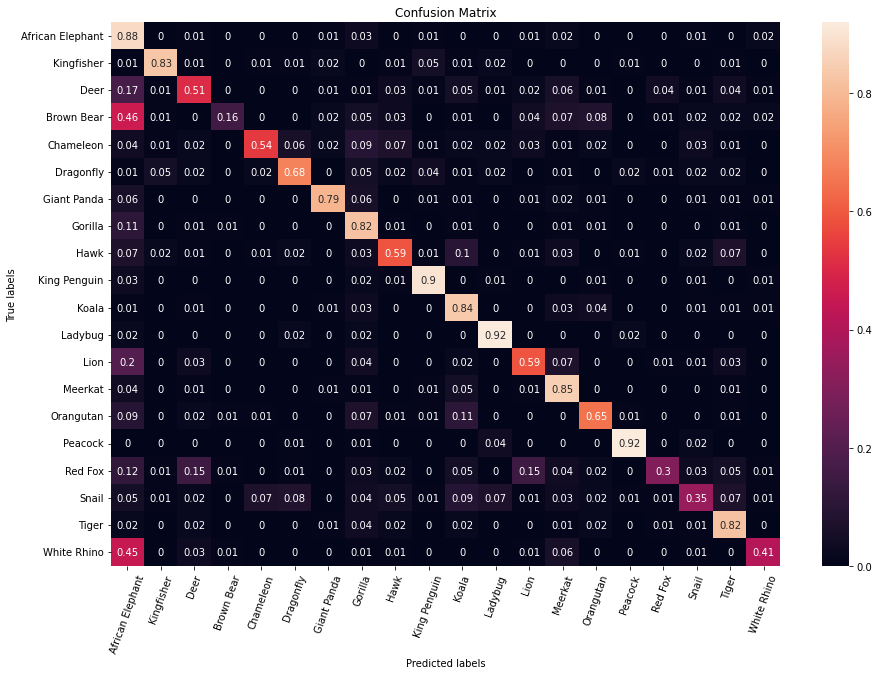

Predicted label ['African Elephant' 'Tiger' 'African Elephant' 'Koala' 'African Elephant'
 'Lion' 'Kingfisher' 'Hawk' 'African Elephant']
True label ['Brown Bear' 'Snail' 'Chameleon' 'Snail' 'White Rhino' 'Red Fox'
 'Brown Bear' 'Chameleon' 'Lion']
Corresponding images are shown below


0.6675

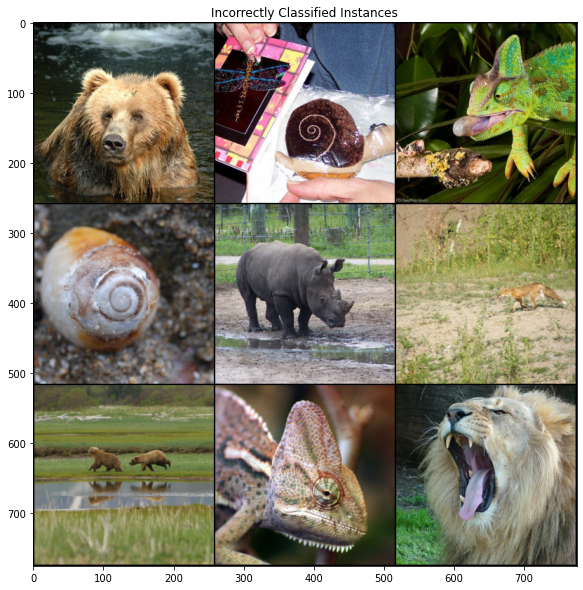

In [11]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
**Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)**

**Answer:**

The most basic way of hyperparameter searching is grid search. This strategy consists in going through a series of manually selected values and finding out which ones has the best performance.

However, instead of having to select the values you could select them randomly. this is called random search and generalises to continuous and mixed spaces.

Another strategy that builds on the concept from random search is Bayesian Optimisation. Initially, we random sample the hyperparameters from a distribution. Bayesian optimisation uses past evaluation results to build a probabilistic model of the function mapping hyperparameter values to the objective evaluated on a validation set. We then find the best hyperparameters that perform the best on the current model, then we apply these hyperparameters to the true objective function. This process is done repetitively until the best hyperparameters are obtained. Gradually we start searching around the hyperparameter values which perform best but at the same time exploring new areas of the parameter space. This method performs better results than random search with fewer evaluations. Important to note that Bayesian optimisation only works on continuous hyperparameters and not in categorical ones e.g. type of gradient descent algorithm used.

With the appropriate resources we could use population based training for hyperparameter search. This method starts similar to random search by training many neural networks in parallel with random hyperparameters. However, in this case the models share between each other their hyperparameters and performance. A model can copy the hyperparameters of another model performing better and also explore new combinations by using random sampling. The process makes no assumptions regarding model architecture, loss functions or training procedures.


Papers demonstrating better performance of Bayesian Optimisation compared to random search:
https://www.cs.ubc.ca/labs/beta/Projects/autoweka/papers/autoweka.pdf
https://proceedings.neurips.cc/paper/2012/file/05311655a15b75fab86956663e1819cd-Paper.pdf
https://www.cs.ubc.ca/labs/beta/Projects/SMAC/papers/11-LION5-SMAC.pdf


Population based training: 
https://deepmind.com/blog/article/population-based-training-neural-networks


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

**Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)**

**Answer:**

**Bacth size unchanged (128):** The batch sized was decreased to 64 and increased to 256, performing with an accuracy of 50.20 and 56.66 respectively. By reducing batch size it means that our model uses a lower number of samples to calculate the loss in each iteration. This has the risk of the model missing the local minima. This happens because we are adding more noise to convergence as smaller batches differentiate more between one another. On the other hand, the problem with increasing batch size too much is that the model ends up converging to a smooth local minimum. However it can be the case that the local minimum found does not generalise well therefore we always want a little bit of noise. This is why the performance for bigger and lower batch sizes was worse.

**Adding Max pool to the first layer:** This reduces the dimensionality of the images. This has three advantages. First, we reduce the computational complexity. Second, by picking only the pixels with the highest activation and discarding the lower valued pixels we reduce the likelihood of overfitting. Third, we increase the network's invariance so accuracy is not affected as much when recognising the same object but with a different shift, rotation or scale.

**Increasing the initial kernel size (from 3 to 7):** By doing this more surrounding information of the image is extracted. This means that the model is more robust to noisy data as it is not affected by defective surfaces. This increases the precision of the model. However, we do not want to increase the size too much so that it is impossible to extract important local information from the 1st convolutional layer.

**Removing the first two layers:** As we are working with a low number of classes (20) we do not need such a deep network. Hence, the first two layers were eliminated to avoid overfitting. Consequently, self.inchannels (the output channels of the first layer) had to be changed from 16 to 64 so the dimensions matched.

**Using average pooling in the end instead of max pooling:** Max pooling is good for extracting extreme features hence why we use it at the beginning but in the last layer we assume that all the features are relevant therefore we use average pooling.

**Increased the learning rate (from 0.0001 to 0.001):** By doing this we reduce the chances of our network finding a sub-optimal local minimum that does not generalise well. Hence, our model finds a broader, flatter minimum which generalises better. When we increased it to 0.01 the network achieved an accuracy of 37.44 meaning that the network converged too quickly and converged to a sub-optimal local minimum. However, given that we use an adaptive learning rate method (Adamax) the value of our learning rate is not going to be as influential on performance.

**Weight decay unchanged (1e-7)**: The weight decay, also called L2 regularisation, is used as a regularisation parameter to avoid our network overfitting. Given the changes done to the network, it already includes a lot of engineering decisions that avoid it overfitting. Actually, when the weight decay was increased to 1e-5 the network performed worse, 65.52.

**Data augmentation:**
The first data augmentation that we changed was applying different autoaugmentation techniques to the train and test set. The preprocessing for the test set was the one given in the template: resizing the image to 256, scale the image uniformly so that both dimensions of the image will be equal, turning the image into a tensor and normalising this tensor. This preprocessing was also applied to the train dataset however in order to train the model from a diverse set of images and stop the model overfitting:
* The brightness, contrast, saturation and hue of an image was changed for 10% of samples.
* The images were blurred with a randomly chosen Gaussian blur. This filter is used for reducing the noise (high frequency components)
* A random perspective transformation was applied to the images for 5% of the samples.


To conclude, we are always looking for ways to build a complex model without it overfitting, hence some design solutions are made so the model detects complex features and others so the model generalises well.

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

**Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)**

**Answer:**

A feature map shows the output activations for a given filter showing us what features the CNN detects. We can see that in the low-level layers (first layers) detect the low-level features (edges and blobs) whereas the high-level features detect more complex features from the object such as faces, wings and legs. For example, the third feature map on the first row of the last layer has a high activation (coloured in yellow) where the face is, so it is very likley that it is picking up the face of the object (penguin in this case).



---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

**Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)**

**Answer:**

**Training Log:**

The training log was changed so that the training accuracy as well as the validation accuracy was outputted to see if the model overfitted.

Epoch 1: Got 946 / 1998 correct of val set (47.35)

Epoch 2: Got 1069 / 1998 correct of val set (53.50)

Epoch 3: Got 1149 / 1998 correct of val set (57.51)

Epoch 4: Got 1205 / 1998 correct of val set (60.31)

Epoch 5: Got 1288 / 1998 correct of val set (64.46)

Epoch 6: Got 1295 / 1998 correct of val set (64.81)

Epoch 7: Got 1297 / 1998 correct of val set (64.91)

Epoch 8: Got 1255 / 1998 correct of val set (62.81)

Epoch 9: Got 1359 / 1998 correct of val set (68.02)

Epoch 10: Got 1393 / 1998 correct of val set (69.72)

From the training log we can see that the model continuously learns until epoch 7. Then the model overfits (that is why it achieves a lower accuracy, 62.81) but then it retrains itself and goes on to increase the accuracy until 69.72. All in all, the behaviour of the training log makes sense as it shows that the model is performing appropiately and correcting any mistakes that it makes.


**Test set accuracy: 66.75**

From this accuracy we can say that our model performs better than random. As we have 20 classes it would mean achieving an accuracy higher than 5%. Given that the benchmark for good performance was set at 50%, and we achieved nearly a 20% more than that we can say we are statisfied with our results.

It is important to note that the ResNet18 from the paper below has. Our model using a dataset of 20 000 images with 20 classes and achieved an accuracy on the test dataset of 66.75%. Whereas the ResNet18 achieved an accuracy of 72.05% on the ImageNet-1k (a dataset 1.2M images with 1000 classes) and they ran their model for 300 epochs.

**Feature maps**

As discussed in the question before, the first layer detects low-level features such as edges and blobs. We can see from the feature map that the first layer has a high activation where there are  edges and blobs. Hence, we can deduce that the model is performing correctly from those layers.

on the high-level layers we see that the model is approximately calculating were the high-level features of the penguin are (the face, wings, etc.) with each feature map representing one of these.  

From the confusion matrix of the test set we see that the model only performs badly on two classes, foxes and white rhines, it has a higher chance of misclassifying than classifying them correctly.


See paper for results of ResNet18 on ImageNet: 
https://arxiv.org/pdf/2103.13027v3.pdf
See accuracy and number of parameters for ResNet18:
https://paperswithcode.com/sota/image-classification-on-imagenet?tag_filter=3

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

**What are the other possible ways to analyse the performance of your network? (2 points)**

**Answer:**

Here we are using the accuracy to measure performance but we could use:
* Precision which is the number of correctly classified positive examples divided by the total number of predicted positive
examples 
* Recall which is the number of correctly classified positive examples divided by the total number of positive examples
* F1-score which is another measure for accuracy using the precision and accuracy values.
F1 = (2* precision * recall)/(precision * recall)
* Accuracy on a different dataset. This would be useful as we would be able check the model's ability to classify animals without the bias from the ImageNet dataset.

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [17]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

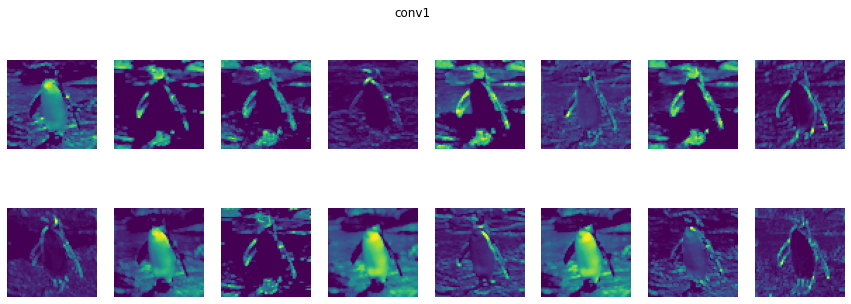

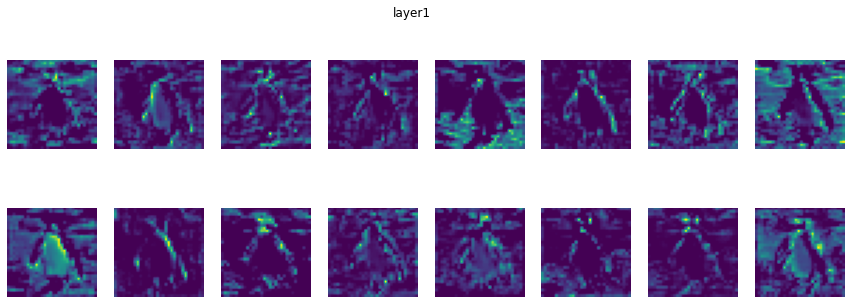

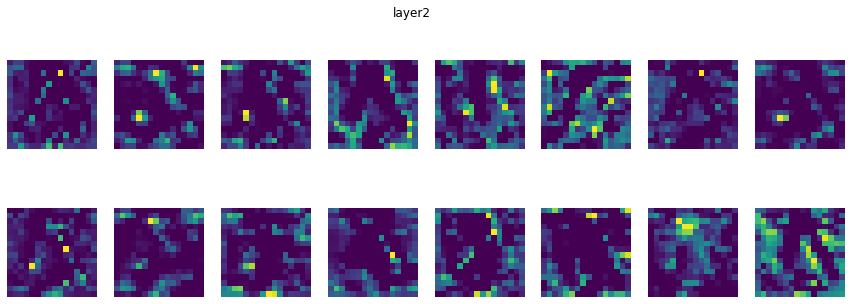

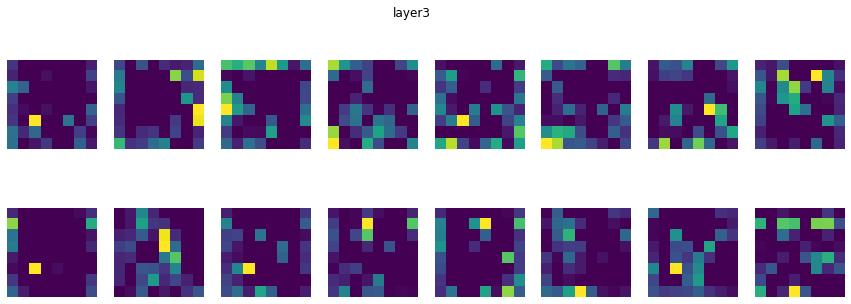

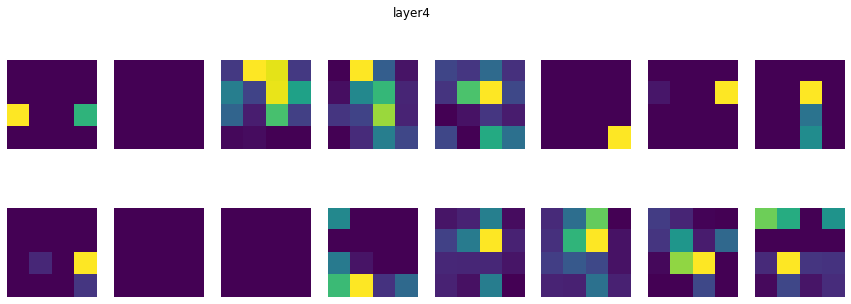

In [18]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [32]:
grader.check_all()

BatchNorm Layer results: All test cases passed!

Convolution Layer results: All test cases passed!

Linear Layer results: All test cases passed!

MaxPool Layer results: All test cases passed!

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)